In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings


In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# prepare X and y variables

X = df.drop(columns = ['math_score'], axis = 1)
y = df['math_score']

In [6]:
# create column transformer 

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_trf = StandardScaler()
oh_trf = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_trf, cat_features),
        ('StandardScaler', num_trf, num_features)
    ]
)

In [7]:
X = preprocessor.fit_transform(X)

In [8]:
X.shape

(1000, 19)

In [9]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [10]:
# define a function to show model evaluation results

def evaluate_model(true_value, predicted_value):
    r2 = r2_score(true_value, predicted_value)
    mae = mean_absolute_error(true_value, predicted_value)
    mse = mean_squared_error(true_value, predicted_value)
    rmse = np.sqrt(mse)

    return r2, mae, rmse

In [17]:
# list of models to try

models = {
    'Linear Regression': LinearRegression(),
    'Lasso':  Lasso(),
    'Ridge': Ridge(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forrest': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose = True),
    'AdaBoostRegressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    #select model from dict
    model = list(models.values())[i]

    #train model
    model.fit(X_train, y_train)

    #predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluate model 
    model_train_r2, model_train_mae, model_train_rmse = evaluate_model(y_train, y_train_pred)
    model_test_r2, model_test_mae, model_test_rmse = evaluate_model(y_test, y_test_pred)

    #print results
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

    print('Model Performance - Training data')
    print('R2: ', model_train_r2)
    print('MAE: ', model_test_mae)
    print('RMSE: ', model_train_rmse)

    print('----------------------------------------')

    print('Model Performance - Test Data')
    print('R2: ', model_test_r2)
    print('MAE: ', model_test_mae)
    print('RMSE: ', model_test_rmse)
    
    print('###########################################')



Linear Regression
Model Performance - Training data
R2:  0.8743172040139593
MAE:  4.21476314247485
RMSE:  5.323050852720514
----------------------------------------
Model Performance - Test Data
R2:  0.8804332983749565
MAE:  4.21476314247485
RMSE:  5.393993869732843
###########################################
Lasso
Model Performance - Training data
R2:  0.8071462015863456
MAE:  5.157881810347763
RMSE:  6.593815587795566
----------------------------------------
Model Performance - Test Data
R2:  0.8253197323627853
MAE:  5.157881810347763
RMSE:  6.519694535667419
###########################################
Ridge
Model Performance - Training data
R2:  0.8743042615212909
MAE:  4.211100688014261
RMSE:  5.323324922741654
----------------------------------------
Model Performance - Test Data
R2:  0.8805931485028737
MAE:  4.211100688014261
RMSE:  5.390387016935642
###########################################
KNN
Model Performance - Training data
R2:  0.8554279731066252
MAE:  5.6370000000000005


In [12]:
print(r2_list)

[0.8804332983749565, 0.8253197323627853, 0.8805931485028737, 0.7834973847119895, 0.7663747275399198, 0.85465922122238, 0.8277965784072876, 0.8516318920747058, 0.8491376309510608]


In [ ]:
# print results in Dataframe
pd.DataFrame([model_list, r2_list]).T.rename(columns = {0:'Model', 1:'R2 score'})

,Model,R2 score
0,Linear Regression,0.880433
1,Lasso,0.82532
2,Ridge,0.880593
3,KNN,0.783497
4,Decision Tree,0.734875
5,Random Forrest,0.847862
6,XGBRegressor,0.827797
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.852339


# Plotting Linear Regression model results

Linear Regression

In [20]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
score = r2_score(y_test, y_pred)*100

print('Model Accuracy: ', round(score, 2))

Model Accuracy:  88.04


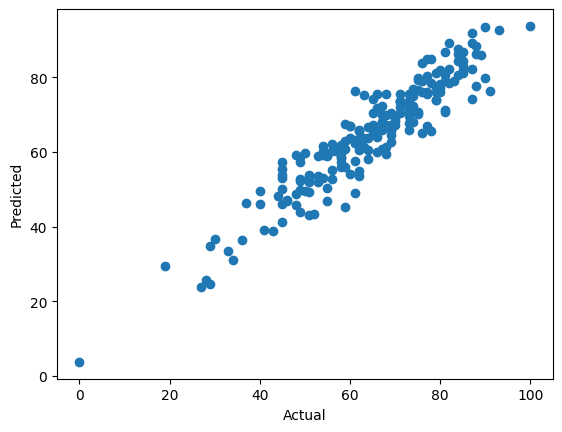

In [22]:
# plot predictions and actual y

plt.scatter(x= y_test, y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math_score'>

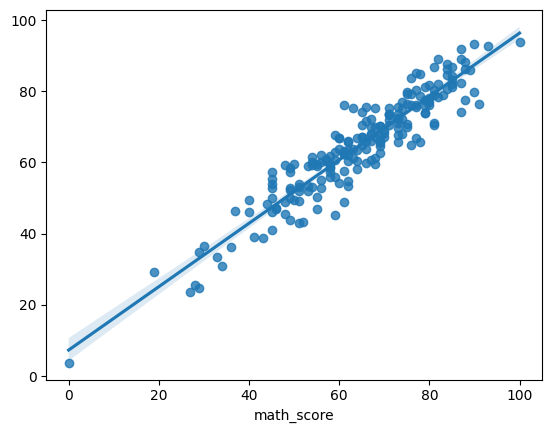

In [23]:
sns.regplot(x = y_test, y= y_pred)

In [25]:
# difference between actual values and predicted values 

pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test-y_pred
})

In [26]:
pred_df['Difference'].mean()

np.float64(-0.23703860181620418)